# Requirements

1. Which product is returned most often?
2. High rating = customer returns?
3. Sales trend over months.
4. Shipping costs vs sales.

# Preparation

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
source_folder  = 'Source Data'
print(os.listdir(source_folder))

['Costs.xlsx', 'orders.csv', 'order_positions.csv', 'order_ratings.csv', 'order_returns.csv', 'products.csv', 'product_groups.csv']


## Costs

In [5]:
df_costs = pd.read_excel(os.path.join(source_folder, 'Costs.xlsx'), sheet_name='cost_forecast')
print(df_costs.info())
df_costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           16 non-null     object
 1   ship           16 non-null     object
 2   cost_forecast  16 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 516.0+ bytes
None


,year,ship,cost_forecast
0,Y2018,First Class,70000
1,Y2018,Same Day,30000
2,Y2018,Second Class,70000
3,Y2018,Standard Class,300000
4,Y2019,First Class,70000


## Orders

In [6]:
df_orders = pd.read_csv(os.path.join(source_folder, 'orders.csv'), sep=';')
print(df_orders.info())
df_orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   order_id           5009 non-null   int64 
 1   customer_id        5009 non-null   int64 
 2   order_date         5009 non-null   object
 3   shipping_date      5009 non-null   object
 4   shipping_mode      5009 non-null   object
 5   delivery_country   5009 non-null   object
 6   delivery_city      5009 non-null   object
 7   delivery_state     5009 non-null   object
 8   delivery_zip_code  5009 non-null   int64 
 9   return             5009 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 391.5+ KB
None


,order_id,customer_id,order_date,shipping_date,shipping_mode,delivery_country,delivery_city,delivery_state,delivery_zip_code,return
0,328,166,04.12.2020,07.12.2020,Second Class,United States,Henderson,Kentucky,42420,37
1,329,262,08.07.2020,12.07.2020,Second Class,United States,Los Angeles,California,90036,1
2,330,728,06.11.2019,13.11.2019,Standard Class,United States,Fort Lauderdale,Florida,33311,47
3,331,111,05.07.2018,10.07.2018,Standard Class,United States,Los Angeles,California,90032,7
4,332,25,11.05.2021,16.05.2021,Standard Class,United States,Concord,North Carolina,28027,14


## Order positions

In [7]:
df_order_positions = pd.read_csv(os.path.join(source_folder, 'order_positions.csv'), sep=';')
print(df_order_positions.info())
df_order_positions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           9994 non-null   int64  
 1   order_position_id  9994 non-null   int64  
 2   product_id         9994 non-null   int64  
 3   item_quantity      9994 non-null   int64  
 4   position_discount  9994 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 390.5 KB
None


,order_id,order_position_id,product_id,item_quantity,position_discount
0,328,108,13,2,0.00
1,328,109,57,3,0.00
2,329,110,960,2,0.00
3,330,111,328,5,0.45
4,330,112,1338,2,0.20


## Order ratings

In [8]:
df_order_ratings = pd.read_csv(os.path.join(source_folder, 'order_ratings.csv'), sep=';')
print(df_order_ratings.info())
df_order_ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   order_id  745 non-null    int64
 1   rating    745 non-null    int64
dtypes: int64(2)
memory usage: 11.8 KB
None


,order_id,rating
0,330,5
1,339,5
2,353,1
3,363,2
4,376,5


## Order returns

In [9]:
df_order_returns = pd.read_csv(os.path.join(source_folder, 'order_returns.csv'), sep=';')
print(df_order_returns.info())
df_order_returns.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   order_id         103 non-null    int64
 1   next_order_free  103 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB
None


,order_id,next_order_free
0,329,0
1,359,0
2,367,0
3,374,0
4,455,0


## Products

In [10]:
df_products = pd.read_csv(os.path.join(source_folder, 'products.csv'), sep=';')
print(df_products.info())
df_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     1894 non-null   int64  
 1   group_id       1894 non-null   int64  
 2   product_name   1894 non-null   object 
 3   product_price  1894 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB
None


,product_id,group_id,product_name,product_price
0,1847,17,Ativa-D5772-2-Line-5.8GHz-Digital-Expandable-C...,164.99
1,1759,17,I-Needs-3d-Hello-Kitty-Hybrid-Silicone-Case-Co...,11.96
2,1829,17,Panasonic-KX-TG9541B-DECT-6.0-Digital-2-Line-E...,149.99
3,1745,17,iKross-Bluetooth-Portable-Keyboard-+-Cell-Phon...,20.95
4,413,5,Holmes-Cool-Mist-Humidifier-for-the-Whole-Hous...,19.90


## Product groups

In [11]:
df_product_groups = pd.read_csv(os.path.join(source_folder, 'product_groups.csv'), sep=';')
print(df_product_groups.info())
df_product_groups.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   group_id  17 non-null     int64 
 1   group     17 non-null     object
 2   category  17 non-null     object
dtypes: int64(1), object(2)
memory usage: 540.0+ bytes
None


,group_id,group,category
0,1,Bookcases,Furniture
1,2,Chairs,Furniture
2,3,Furnishings,Furniture
3,4,Tables,Furniture
4,5,Appliances,Office Supplies


# Clean and join data

### Clean before joining

In [12]:
df_costs['year'] = df_costs['year'].str.extract(r'(\d{4})').astype(int)
df_costs.head()

,year,ship,cost_forecast
0,2018,First Class,70000
1,2018,Same Day,30000
2,2018,Second Class,70000
3,2018,Standard Class,300000
4,2019,First Class,70000


In [13]:
df_orders = df_orders.drop(columns=['shipping_date', 'delivery_country', 'delivery_city', 'delivery_state', 'delivery_zip_code', 'return'])
df_orders.head()

,order_id,customer_id,order_date,shipping_mode
0,328,166,04.12.2020,Second Class
1,329,262,08.07.2020,Second Class
2,330,728,06.11.2019,Standard Class
3,331,111,05.07.2018,Standard Class
4,332,25,11.05.2021,Standard Class


In [14]:
df_order_returns['is_returned'] = 1
df_order_returns.head()

,order_id,next_order_free,is_returned
0,329,0,1
1,359,0,1
2,367,0,1
3,374,0,1
4,455,0,1


### Join data

In [15]:
df1 = pd.merge(
    pd.merge(df_orders, df_order_positions, on='order_id', how='inner'),
    df_products, on='product_id', how='inner'
)
df1.head()

,order_id,customer_id,order_date,shipping_mode,order_position_id,product_id,item_quantity,position_discount,group_id,product_name,product_price
0,328,166,04.12.2020,Second Class,108,13,2,0.00,1,Bush-Somerset-Collection-Bookcase,130.98
1,328,166,04.12.2020,Second Class,109,57,3,0.00,2,Hon-Deluxe-Fabric-Upholstered-Stacking-Chairs-...,243.98
2,329,262,08.07.2020,Second Class,110,960,2,0.00,10,Self-Adhesive-Address-Labels-for-Typewriters-b...,7.31
3,330,728,06.11.2019,Standard Class,111,328,5,0.45,4,Bretford-CR4500-Series-Slim-Rectangular-Table,348.21
4,330,728,06.11.2019,Standard Class,112,1338,2,0.20,12,Eldon-Fold-N-Roll-Cart-System,13.98


In [16]:
df = pd.merge(
    pd.merge(df1, df_order_returns, on='order_id', how='left'),
    df_order_ratings, on='order_id', how='left'
)
df.head()

,order_id,customer_id,order_date,shipping_mode,order_position_id,product_id,item_quantity,position_discount,group_id,product_name,product_price,next_order_free,is_returned,rating
0,328,166,04.12.2020,Second Class,108,13,2,0.00,1,Bush-Somerset-Collection-Bookcase,130.98,NaN,NaN,NaN
1,328,166,04.12.2020,Second Class,109,57,3,0.00,2,Hon-Deluxe-Fabric-Upholstered-Stacking-Chairs-...,243.98,NaN,NaN,NaN
2,329,262,08.07.2020,Second Class,110,960,2,0.00,10,Self-Adhesive-Address-Labels-for-Typewriters-b...,7.31,0.0,1.0,NaN
3,330,728,06.11.2019,Standard Class,111,328,5,0.45,4,Bretford-CR4500-Series-Slim-Rectangular-Table,348.21,NaN,NaN,5.0
4,330,728,06.11.2019,Standard Class,112,1338,2,0.20,12,Eldon-Fold-N-Roll-Cart-System,13.98,NaN,NaN,5.0


In [17]:
df[df['is_returned'].notna() & df['rating'].notna()].head()

,order_id,customer_id,order_date,shipping_mode,order_position_id,product_id,item_quantity,position_discount,group_id,product_name,product_price,next_order_free,is_returned,rating
664,637,651,30.11.2020,Same Day,772,922,3,0.0,9,OIC-Colored-Binder-Clips-Assorted-Sizes,3.58,0.0,1.0,4.0
941,777,684,08.01.2021,Standard Class,1049,722,2,0.2,7,Acco-Pressboard-Covers-with-Storage-Hooks-14-7...,3.05,0.0,1.0,5.0
942,777,684,08.01.2021,Standard Class,1050,328,4,0.2,4,Bretford-CR4500-Series-Slim-Rectangular-Table,348.21,0.0,1.0,5.0
2226,1417,470,24.08.2021,Standard Class,2334,945,2,0.2,9,Assorted-Color-Push-Pins,1.81,0.0,1.0,2.0
2227,1417,470,24.08.2021,Standard Class,2335,1804,1,0.2,17,Cisco-SPA301,155.99,0.0,1.0,2.0


In [18]:
def print_result(s):
    print('\n', '-' * len(s), '\n', s, '\n', '-' * len(s), '\n')

# R1: Which product is returned most often?

In [20]:

df_prod_returned = df[df['is_returned'] == 1]
df_prod_returned_agg = df_prod_returned.groupby(['product_id', 'product_name']).agg(
    qty_returned=('item_quantity', 'sum'),
    orders_returned=('order_id', 'nunique')
)


df_prod_total_agg = df.groupby(['product_id', 'product_name']).agg(
    qty_total = ('item_quantity', 'sum'),
    orders_total =('order_id', 'nunique')
)


df_prod_returned_agg_f = pd.merge(df_prod_returned_agg, df_prod_total_agg, on = ['product_id', 'product_name'], how='inner')

 
df_prod_returned_agg_f['qty_return_prc'] =  round((df_prod_returned_agg_f['qty_returned'] / df_prod_returned_agg_f['qty_total']) * 100, 2)
df_prod_returned_agg_f['orders_return_prc'] =  round((df_prod_returned_agg_f['orders_returned'] / df_prod_returned_agg_f['orders_total']) * 100, 2)


df_prod_returned_agg_f = df_prod_returned_agg_f.sort_values(by='qty_returned', ascending=False)

df_prod_returned_agg_f.head(10)

,,qty_returned,orders_returned,qty_total,orders_total,qty_return_prc,orders_return_prc
product_id,product_name,,,,,,
669,Avery-Durable-Binders,13,2,50,12,26.00,16.67
1734,Polycom-VVX-310-VoIP-phone,13,2,40,8,32.50,25.00
1128,Xerox-232,11,1,19,4,57.89,25.00
996,Permanent-Self-Adhesive-File-Folder-Labels-for-Typewriters-1-1-8-x-3-1-2-White,11,1,29,6,37.93,16.67
125,Global-Super-Steno-Chair,10,2,30,7,33.33,28.57
150,6-Cubicle-Wall-Clock-Black,9,1,19,4,47.37,25.00
570,Prang-Drawing-Pencil-Set,9,1,22,4,40.91,25.00
1592,Logitech-910-002974-M325-Wireless-Mouse-for-Web-Scrolling,9,2,52,15,17.31,13.33
1250,Wirebound-Message-Book-4-per-Page,9,1,35,7,25.71,14.29


# R2: High rating = customer returns?

C:\Users\dawid\AppData\Local\Temp\ipykernel_16660\3096603380.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='unique_customers', data=df_rating_agg, palette='Set2')


  rating  unique_customers
0    1.0                67
1    2.0                63
2    3.0                65
3    4.0                58
4    5.0               282
5   none               776


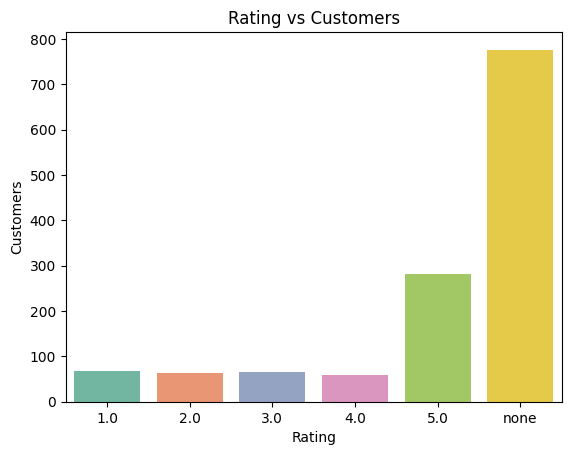

In [21]:
df_ratings = df[['order_id', 'customer_id', 'order_date', 'rating']].drop_duplicates().reset_index(drop=True)

df_ratings['last_order'] = df_ratings.groupby('customer_id')['order_date'].transform('max')
df_ratings = df_ratings[df_ratings['last_order'] != df_ratings['order_date']]
df_ratings['rating'] = df_ratings['rating'].fillna('none')

df_rating_agg = df_ratings.groupby('rating')['customer_id'].nunique()

df_rating_agg = df_rating_agg.reset_index()
df_rating_agg.columns = ['rating', 'unique_customers']

sns.barplot(x='rating', y='unique_customers', data=df_rating_agg, palette='Set2')

plt.xlabel('Rating')
plt.ylabel('Customers')
plt.title('Rating vs Customers')

print(df_rating_agg)

plt.show()

# R3: Sales trend over months

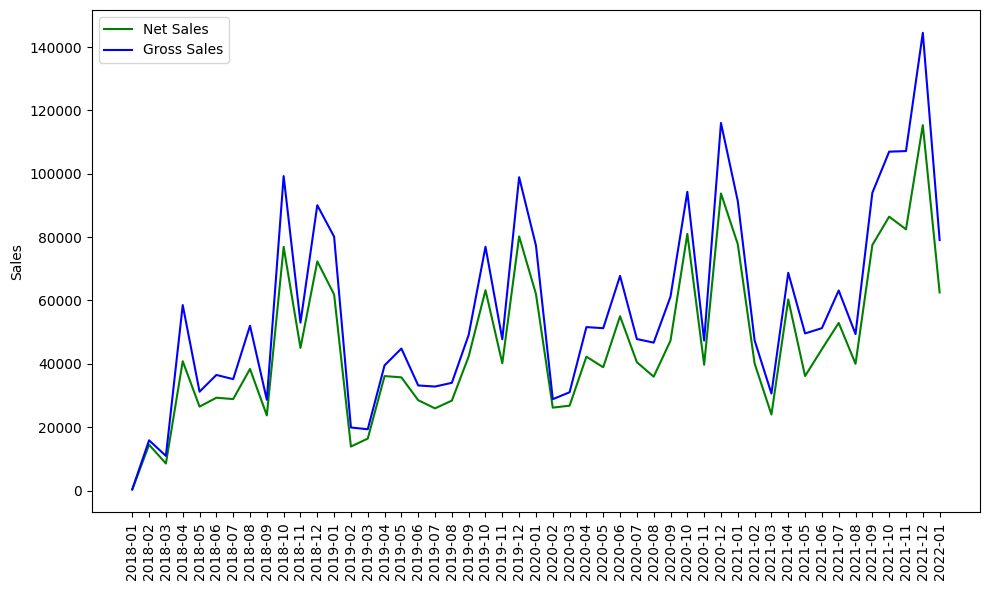

In [23]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%d.%m.%Y', errors ='coerce')

df['discount_abs'] = df['product_price'] * df['item_quantity'] * df['position_discount']
df['sales_gross'] = df['product_price'] * df['item_quantity']
df['sales_net'] = round(df['sales_gross'] - df['discount_abs'], 2)
df[['product_price', 'item_quantity', 'position_discount', 'sales_net', 'discount_abs', 'sales_gross']]

monthly_sales = df.groupby(df['order_date'].dt.to_period('M'))[['sales_net', 'sales_gross']].sum().reset_index()
monthly_sales.columns = ['Order Month', 'Net Sales', 'Gross Sales']

monthly_sales['Order Month'] = monthly_sales['Order Month'].astype(str)

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Order Month'], monthly_sales['Net Sales'], label='Net Sales', color='green')
plt.plot(monthly_sales['Order Month'], monthly_sales['Gross Sales'], label='Gross Sales', color='blue')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()